Libraries

In [88]:
!pip install wordcloud

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

dfset

In [90]:
df=pd.read_csv("startup_funding.csv")

In [91]:
df.columns


Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [92]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [93]:
df.shape

(3044, 10)

In [94]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [95]:
def format(x):
  return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

for col in ["Startup Name",	"Industry Vertical",	"SubVertical",'City  Location',"Investors Name",	"InvestmentnType","Amount in USD","Remarks"]:
  df[col]=df[col].apply(lambda x: format(x))

In [96]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [97]:
df.isna()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3039,False,False,False,False,False,False,False,False,False,False
3040,False,False,False,False,False,False,False,False,False,False
3041,False,False,False,False,False,False,False,False,False,False
3042,False,False,False,False,False,False,False,False,False,False


In [98]:
df.isnull().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Remarks              0
dtype: int64

In [99]:
df.drop("Remarks", axis='columns')

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,nan,nan,nan,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,nan,nan,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,nan,nan,nan,MakeMyTrip,Private Equity,nan


In [100]:
df.dtypes


Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [101]:
df["Amount in USD"] = df["Amount in USD"].str.replace(',', '')
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"], errors='coerce')
df.dropna(subset=["Amount in USD"], inplace=True)
df["Amount in USD"] = df["Amount in USD"].astype(int)

In [102]:
df["Amount in USD"]

0       200000000
1         8048394
2        18358860
3         3000000
4         1800000
          ...    
3038      2500000
3039      4500000
3040       825000
3041      1500000
3043       140000
Name: Amount in USD, Length: 2072, dtype: int64

In [103]:

def clean_and_convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y')
    except ValueError:
        return pd.to_datetime(date_str, format='%d/%m/%y',errors="coerce")


df["Date dd/mm/yyyy"] = df["Date dd/mm/yyyy"].apply(clean_and_convert_date)


Kernel Density Estimation (KDE) Plot

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) Plot')

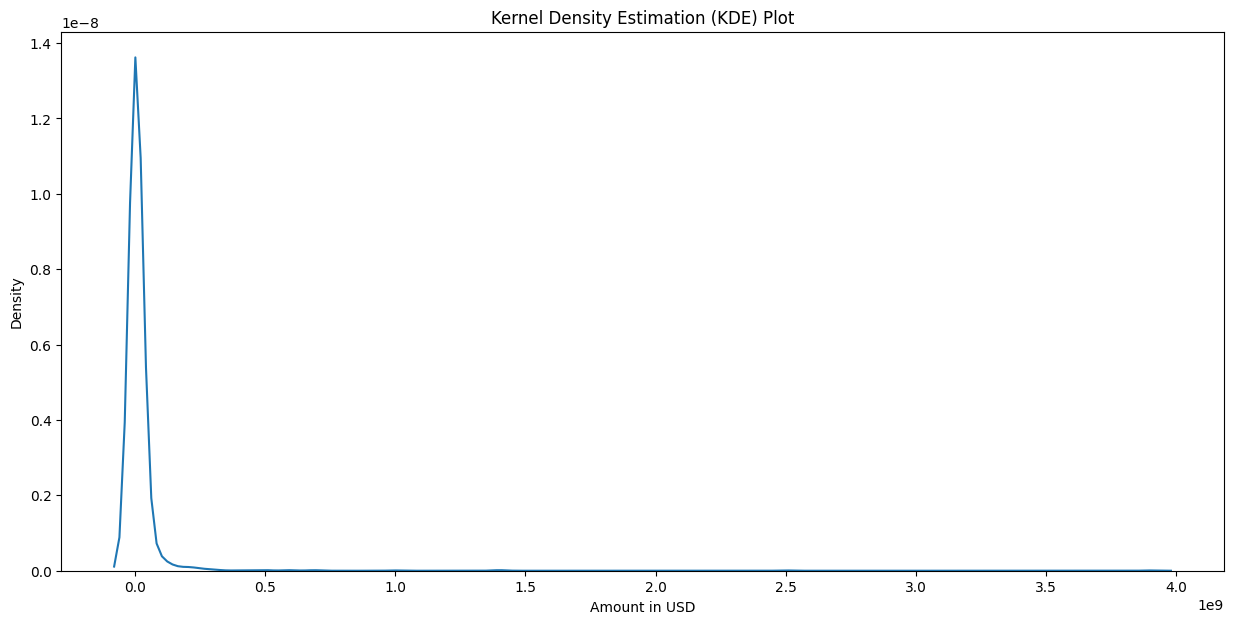

In [104]:
sns.kdeplot(df["Amount in USD"])
plt.xlabel("Amount in USD")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) Plot")

WordCloud Of Investor Names

Text(0.5, 1.0, 'Word Cloud of Investors Names')

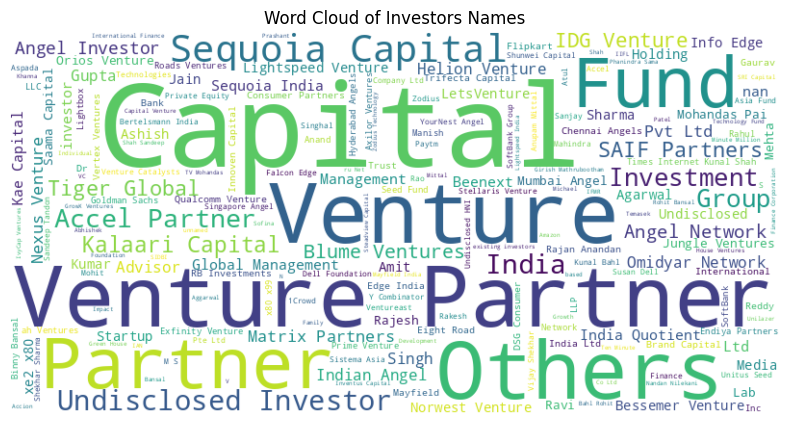

In [129]:
text_data = " ".join(df["Investors Name"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Investors Names')


Number of funding per month in decreasing order(Top 10)
 2015-02-02    10
2016-11-30    10
2016-05-04     9
2015-07-08     9
2019-09-04     7
2015-08-10     7
2016-10-04     7
2015-07-23     7
2015-06-01     7
2015-05-19     7
Name: Date dd/mm/yyyy, dtype: int64


Text(0.5, 1.0, 'Year-Month Distribution')

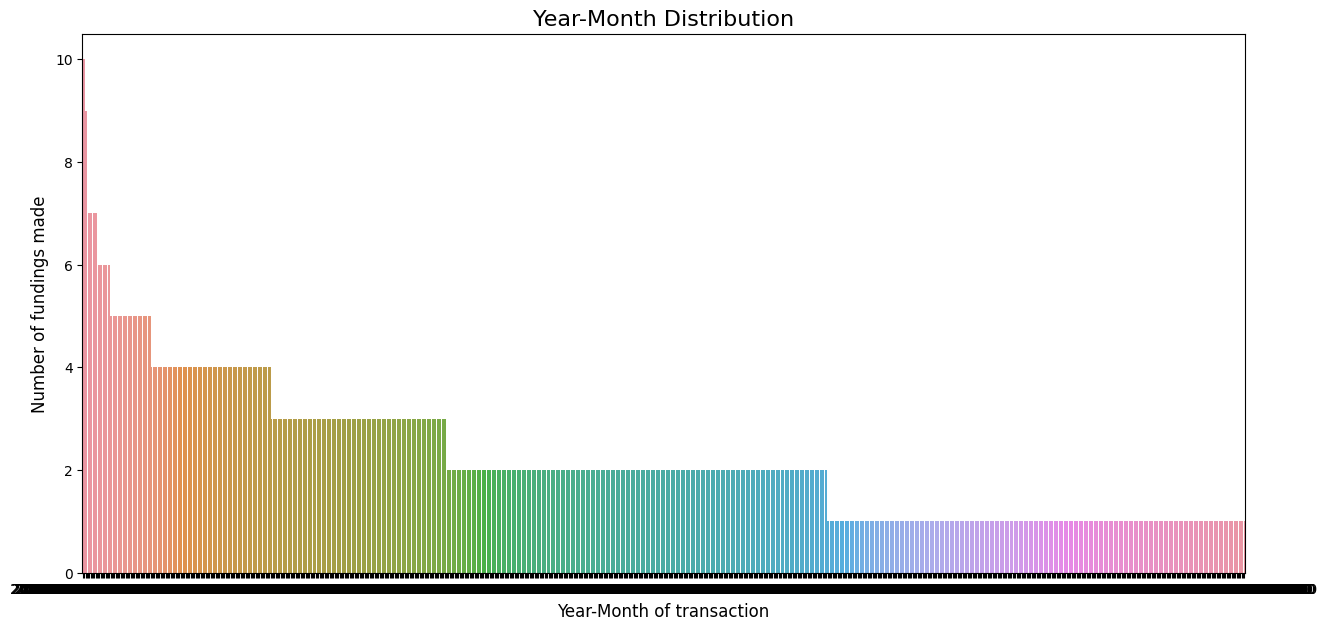

In [105]:
temp = df["Date dd/mm/yyyy"].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df["Date dd/mm/yyyy"].value_counts()
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x=year_month.index, y=year_month.values)
plt.xticks(rotation = 0)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)


Max Funding Ever Received

In [106]:
df["Amount in USD"].dropna().sort_values().max()

3900000000

Startups with more than 50cr+ funding

In [107]:
filtered_df = df[df["Amount in USD"] > 500000000]
print(filtered_df["Startup Name"].sort_values)


<bound method Series.sort_values of 31                 Paytm
33                 Udaan
60      Rapido Bike Taxi
188           True North
651             Flipkart
830                Paytm
966             Flipkart
2459               Paytm
2648        Flipkart.com
Name: Startup Name, dtype: object>


In [108]:
df[df["Startup Name"]=="Flipkart"]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
651,652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2500000000,nan
773,774,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,71000000,nan
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1400000000,nan
1032,1033,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,38700000,nan
2689,2690,2015-06-04,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,50000000,Late Stage


Min Funding

In [109]:
df["Amount in USD"].dropna().sort_values().min()

16000

Average Funding

In [110]:
df["Amount in USD"].mean()

18402303.50530888

Pair Plot

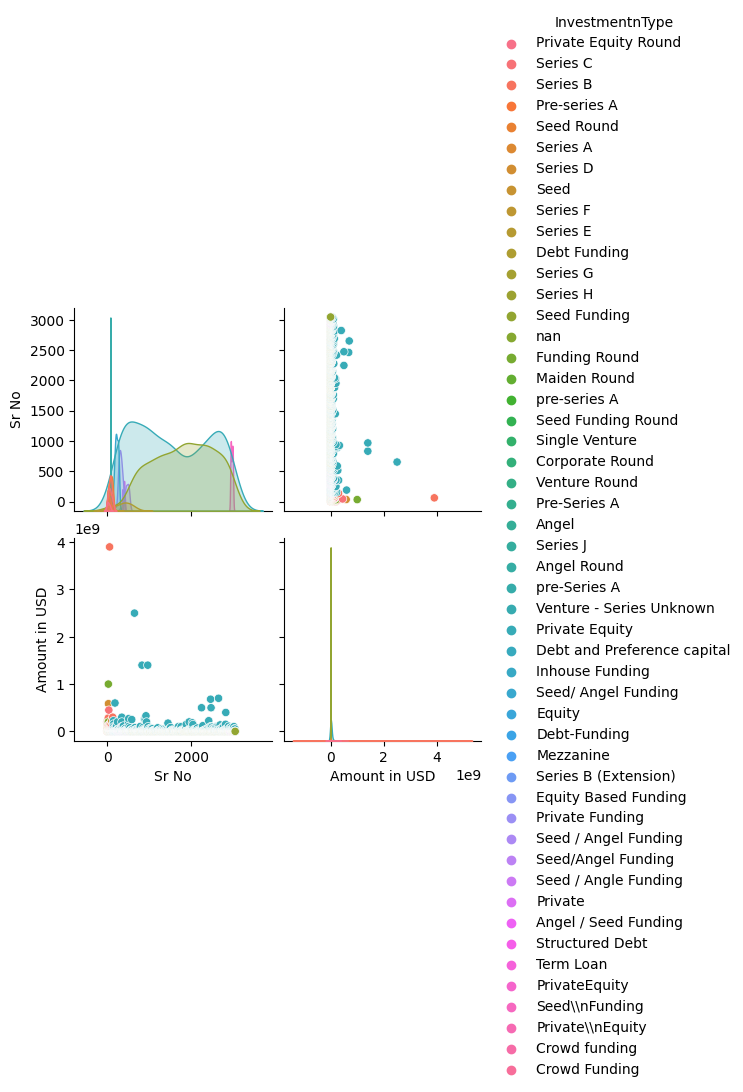

In [131]:
sns.pairplot(df, hue="InvestmentnType")

Barplot

Text(0.5, 1.0, 'No of Fundings')

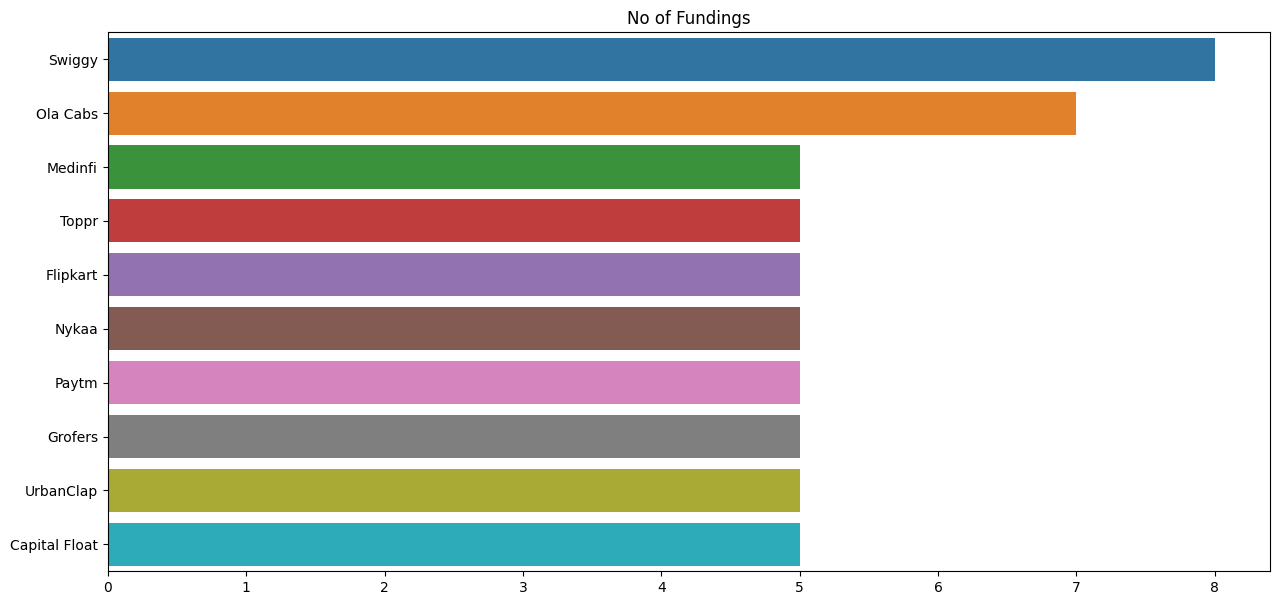

In [111]:
sns.barplot(y=df["Startup Name"].value_counts().head(10).index,x=df["Startup Name"].value_counts().head(10).values)
plt.title("No of Fundings")

Text(0.5, 1.0, 'Industry vertical of startups with number of funding')

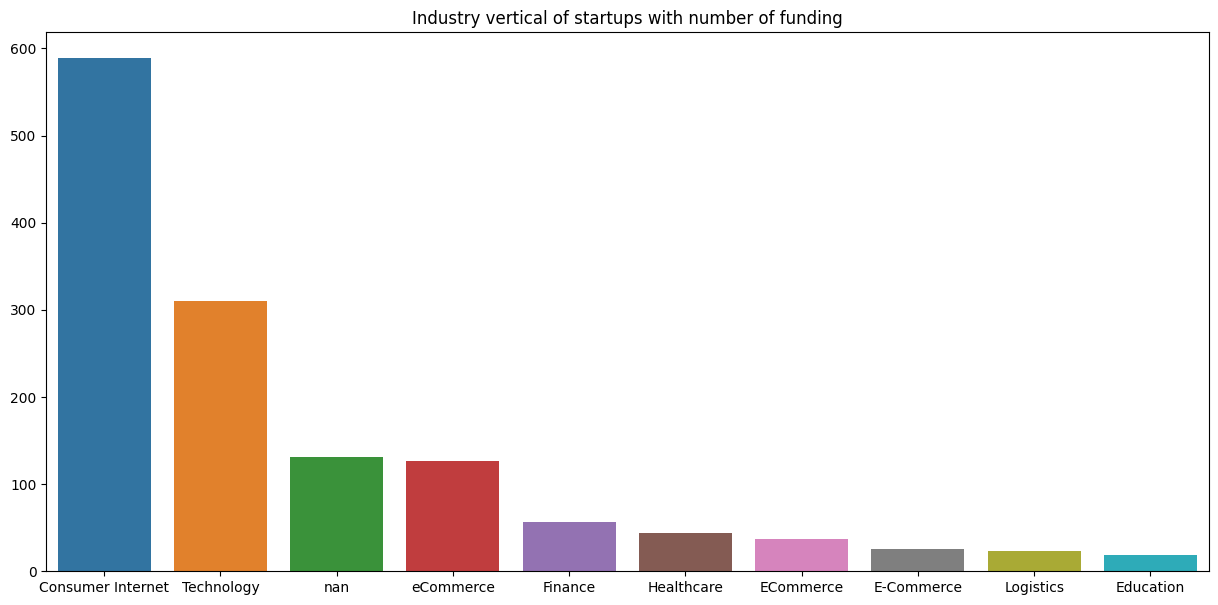

In [112]:
sns.barplot(x=df['Industry Vertical'].value_counts().head(10).index, y=df['Industry Vertical'].value_counts().head(10).values)
plt.title("Industry vertical of startups with number of funding")


<ipython-input-113-1272acfbc5d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Text(0.5, 1.0, 'Correlation Matrix')

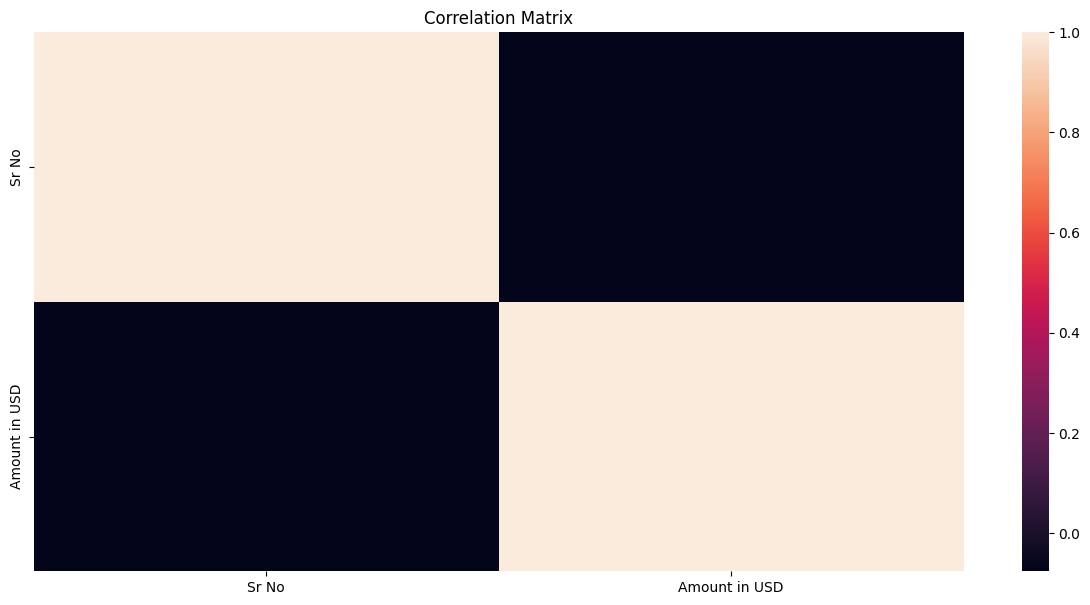

In [113]:
sns.heatmap(df.corr())
plt.title("Correlation Matrix")

FacetGrid

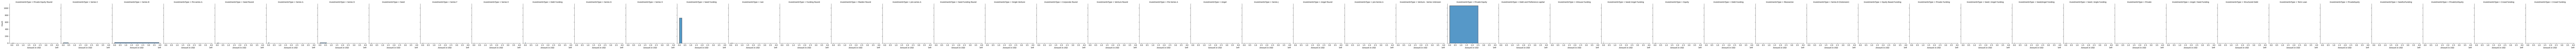

In [139]:
g = sns.FacetGrid(df, col='InvestmentnType', height=4)
g.map(sns.histplot, 'Amount in USD',bins=1)

Text(0.5, 1.0, 'Sub vertical of startups with number of funding')

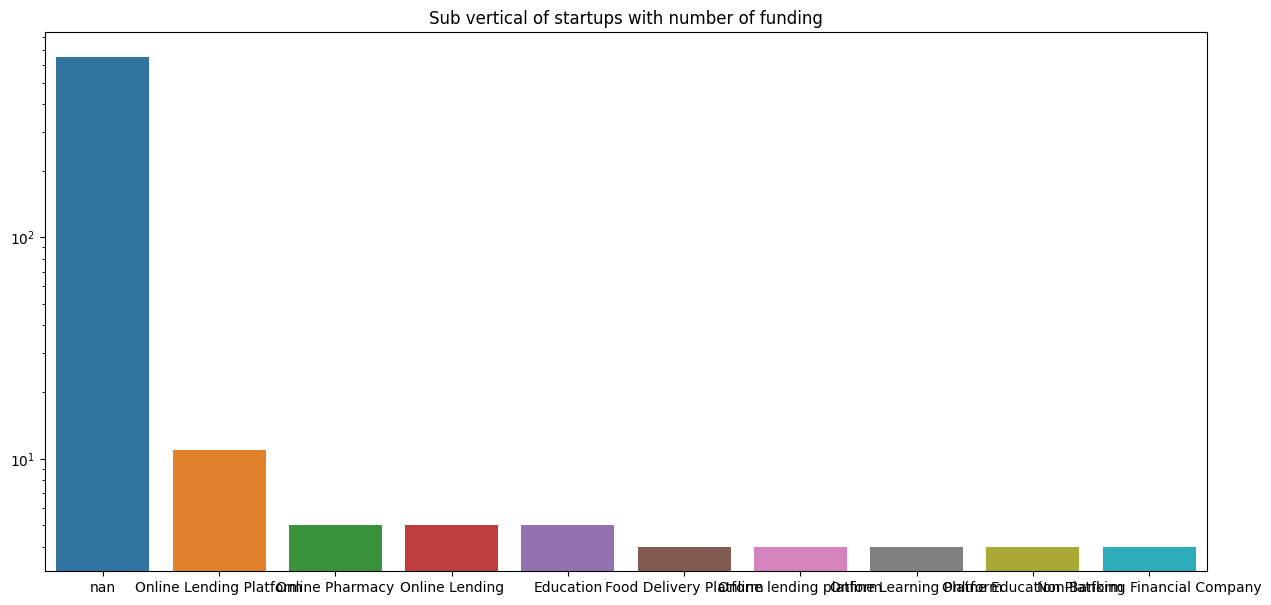

In [114]:
sns.barplot(x=df['SubVertical'].value_counts().head(10).index, y=df['SubVertical'].value_counts().head(10).values,log=True)
plt.yscale('log')
plt.title("Sub vertical of startups with number of funding")

Text(0.5, 1.0, 'city location of startups with number of funding')

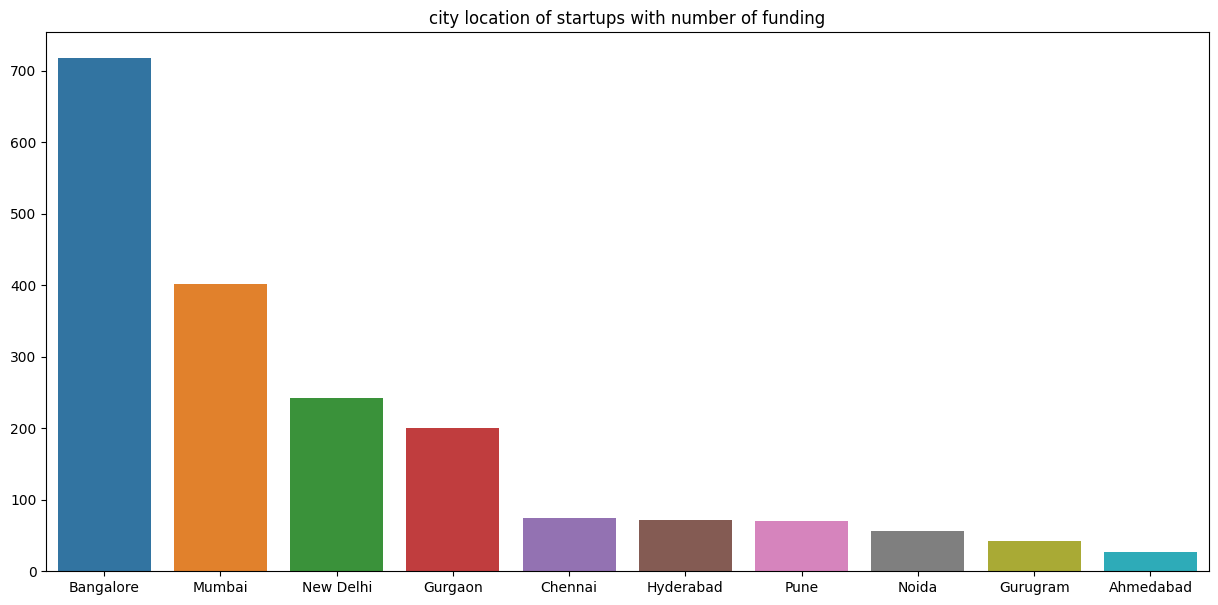

In [122]:
df = df.dropna(subset=['City  Location'])
df.dropna(subset=['City  Location'], inplace=True)
city = df['City  Location'].value_counts().head(10)
sns.barplot(x= df['City  Location'].value_counts().head(10).index, y= df['City  Location'].value_counts().head(10).values)
plt.title("city location of startups with number of funding")
